<center><h1 style="font-size:3em"> Criminal Networks: Sicilian Mafia </h1></center>

In [1]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import altair as alt

# Networks
import networkx as nx
import nx_altair as nxa
from networkx.algorithms.community import greedy_modularity_communities

# First exploration

In [2]:
file = open('Datasets/Montagna_meetings_edgelist.csv', 'r')
#lines = fin.readlines()

G = nx.Graph()
for row in file:
    r = row.split()
    n1, n2, w = int(r[0]), int(r[1]), int(r[2])
    G.add_node(n1)
    G.add_node(n2)
    G.nodes[n1]['id'] = n1
    G.nodes[n2]['id'] = n2
    G.add_edge(n1, n2)
    G.edges[(n1,n2)]['weight']=w
    G.edges[(n1,n2)]['method']='meetings'

In [3]:
G.nodes[0]

{'id': 0}

In [4]:
G.edges[(0,1)]

{'weight': 1, 'method': 'meetings'}

In [5]:
pos = nx.spring_layout(G)

chart = nxa.draw_networkx(
    G=G,
    pos=pos,
    width='weight:N'
).properties(title="Sicilian Mafia physical meetings", height=500, width=500
).interactive()

chart

alt.LayerChart(...)

In [6]:
chart.save('chart.html')

In [7]:
G.degree

DegreeView({0: 2, 1: 2, 2: 2, 3: 8, 4: 6, 5: 10, 6: 10, 7: 6, 8: 6, 9: 6, 10: 5, 11: 12, 12: 16, 13: 6, 14: 6, 15: 6, 16: 1, 17: 1, 18: 24, 19: 9, 20: 2, 21: 2, 22: 14, 23: 8, 24: 1, 25: 13, 26: 2, 27: 16, 28: 5, 29: 13, 30: 2, 31: 2, 32: 2, 33: 3, 34: 6, 35: 5, 36: 8, 37: 2, 38: 3, 39: 7, 40: 3, 41: 3, 42: 3, 43: 9, 44: 3, 45: 12, 46: 4, 47: 19, 48: 12, 49: 4, 50: 8, 51: 11, 52: 3, 53: 2, 54: 6, 55: 2, 56: 1, 57: 1, 58: 2, 59: 2, 60: 2, 61: 4, 62: 1, 63: 4, 64: 6, 65: 1, 66: 1, 67: 1, 68: 15, 69: 1, 70: 6, 71: 2, 72: 2, 73: 1, 74: 1, 75: 4, 76: 7, 77: 3, 78: 2, 79: 5, 80: 3, 81: 3, 82: 3, 83: 2, 84: 4, 85: 8, 86: 4, 87: 4, 88: 2, 89: 12, 90: 2, 91: 2, 92: 2, 93: 6, 94: 2, 95: 3, 96: 1, 97: 3, 98: 2, 99: 1, 100: 4})

# Network description

In [8]:
c_degree = nx.degree_centrality(G)
c_degree = list(c_degree.values())
c = list(greedy_modularity_communities(G))

nb_nodes = len(list(G.nodes()))
nb_edges = len(list(G.edges()))
degrees = list(dict(G.degree()).values())
avg_degree = np.mean(degrees)
median_degree = np.median(degrees)
max_degree = np.max(degrees)        
min_degree = np.min(degrees) 
avg_centrality = np.mean(c_degree) 
min_centrality = np.min(c_degree) 
max_centrality = np.max(c_degree) 
median_centrality = np.median(c_degree) 

In [9]:
print("Number of nodes: ", nb_nodes)
print("Number of edges: ", nb_edges)
print("Average degree: ", avg_degree)
print("Median degree: ", median_degree)
print("Max degree: ", max_degree)
print("Min degree: ", min_degree)
print("Average centrality: ", avg_centrality)
print("Median centrality: ", median_centrality)
print("Max centrality: ", max_centrality)
print("Min centrality: ", min_centrality)

Number of nodes:  101
Number of edges:  256
Average degree:  5.069306930693069
Median degree:  3.0
Max degree:  24
Min degree:  1
Average centrality:  0.050693069306930696
Median centrality:  0.03
Max centrality:  0.24
Min centrality:  0.01


In [10]:
hist = alt.Chart(pd.DataFrame(degrees, columns=['Degrees'])).mark_bar().encode(
    alt.X("Degrees:Q", bin=alt.Bin(maxbins=25)),
    y='count()').properties(title="Degree Distribution", height=300, width=500)

hist

alt.Chart(...)

In [11]:
hist.save('hist.html')

# Network matching

In [12]:
file = open('Datasets/Montagna_phonecalls_edgelist.csv', 'r')

for row in file:
    r = row.split()
    n1, n2, w = int(r[0]), int(r[1]), int(r[2])
    G.add_node(n1)
    G.add_node(n2)
    G.nodes[n1]['id'] = n1
    G.nodes[n2]['id'] = n2
    G.add_edge(n1, n2)
    G.edges[(n1,n2)]['weight']=w
    G.edges[(n1,n2)]['method']='phonecalls'

In [13]:
pos = nx.spring_layout(G)

chart = nxa.draw_networkx(
    G=G,
    pos=pos,
    width='weight:N'
).properties(title="Sicilian Mafia all meetings", height=500, width=500
).interactive()

chart

alt.LayerChart(...)

In [14]:
chart.save('chart_all.html')

In [15]:
c_degree = nx.betweenness_centrality(G)
c_degree = list(c_degree.values())
c = list(greedy_modularity_communities(G))

nb_nodes = len(list(G.nodes()))
nb_edges = len(list(G.edges()))
degrees = list(dict(G.degree()).values())
avg_degree = np.mean(degrees)
median_degree = np.median(degrees)
max_degree = np.max(degrees)        
min_degree = np.min(degrees) 
avg_centrality = np.mean(c_degree) 
min_centrality = np.min(c_degree) 
max_centrality = np.max(c_degree) 
median_centrality = np.median(c_degree) 

In [16]:
print("Number of nodes: ", nb_nodes)
print("Number of edges: ", nb_edges)
print("Average degree: ", avg_degree)
print("Median degree: ", median_degree)
print("Max degree: ", max_degree)
print("Min degree: ", min_degree)
print("Average centrality: ", avg_centrality)
print("Median centrality: ", median_centrality)
print("Max centrality: ", max_centrality)
print("Min centrality: ", min_centrality)

Number of nodes:  154
Number of edges:  342
Average degree:  4.441558441558442
Median degree:  2.0
Max degree:  41
Min degree:  1
Average centrality:  0.0130344801397433
Median centrality:  0.0
Max centrality:  0.4613794133669794
Min centrality:  0.0


# Centrality

In [17]:
# Centrality
for n in G.nodes():
    if c_degree[n] > 0.15:
        G.nodes[n]['is_central'] = 'yes'
    else:
        G.nodes[n]['is_central'] = 'no'
        
    if n in list(c[0]):
        G.nodes[n]['community'] = '0'
    elif n in list(c[1]):
        G.nodes[n]['community'] = '1'
    elif n in list(c[2]):
        G.nodes[n]['community'] = '2'
    elif n in list(c[3]):
        G.nodes[n]['community'] = '3'
    elif n in list(c[4]):
        G.nodes[n]['community'] = '4'
    elif n in list(c[5]):
        G.nodes[n]['community'] = '5'
    elif n in list(c[6]):
        G.nodes[n]['community'] = '6'
    elif n in list(c[7]):
        G.nodes[n]['community'] = '7'
    elif n in list(c[8]):
        G.nodes[n]['community'] = '8'

In [18]:
chart = nxa.draw_networkx(
    G=G,
    pos=nx.spring_layout(G),
    width='weight:N',
    node_tooltip=['id','is_central']
)

edges = chart.layer[0].properties(height=500, width=500)
nodes = chart.layer[1].properties(height=500, width=500)

nodes = nodes.encode(
    fill='is_central:N',
    color='is_central:N'
).properties(
    height=500, width=500, title="Centrality"
)

central = (edges+nodes).interactive()

central

alt.LayerChart(...)

In [19]:
central.save('central_nodes.html')

# Community

In [20]:
chart = nxa.draw_networkx(
    G=G,
    pos=nx.spring_layout(G),
    width='weight:N',
    node_tooltip=['id','community']
)

edges = chart.layer[0].properties(height=500, width=500)
nodes = chart.layer[1].properties(height=500, width=500)

nodes = nodes.encode(
    fill='community:N',
    color='community:N'
).properties(
    height=500, width=500, title="Community"
)

central = (edges+nodes).interactive()

central

alt.LayerChart(...)

In [21]:
central.save("community.html")

# Metrics and Disruption

In [22]:
import array
import copy

toremove = array.array('i', [])
nrem = 5
names = ['id', 'data']
formats = ['int32', 'int32']
dtype = dict(names=names, formats=formats)

In [41]:
def collective_influence_centality(Graph, torem, weight=None):

    colinf = dict()
    for node in Graph:
        summatory = 0
        for iter_node in Graph.neighbors(node):
            if weight is None:
                summatory += Graph.degree(iter_node) - 1
            else:
                summatory += Graph.degree(iter_node, weight='weight') - 1
        if weight is None:
            colinf[node] = (Graph.degree(node) - 1) * summatory
        else:
            colinf[node] = (Graph.degree(node) - 1) * summatory #, weight='weight'
    npcolinf = np.fromiter(colinf.items(), dtype=dtype, count=len(colinf))
    sorted_colinf = np.sort(npcolinf, order='data')
    for rem_n in range(1, nrem + 1):
        # To populate the array of the nodes to be removed (the nrem ones with the highest centrality score).
        torem.append(sorted_colinf[-rem_n][0])  # Sorted in descreasing order.
    return torem

In [42]:
collective_influence_centality(G, toremove)

array('i', [18, 47, 27, 29, 68, 18, 47, 27, 29, 68])

In [25]:
for x in nx.connected_components(G):
    print(nx.number_of_nodes(G.subgraph(x)))

3
145
2
2
2


In [26]:
def lcc_size(graph):

    compsize = []
    for c in nx.connected_components(graph):
        compsize.append(nx.number_of_nodes(graph.subgraph(c)))
    return max(compsize)

In [43]:
lcc_size(G)

145

## Sequential disruption

In [44]:
def disruption_sequence(Graph, weight=None):

    Gor = copy.deepcopy(Graph)
    lccinit = lcc_size(Graph) 
    dflcc = pd.DataFrame()
    dflccvar = pd.DataFrame()

    dictx = dict()
    dicty = dict()
    kiter = 0
    toremove = array.array('i', [])
    
    while Gor.number_of_nodes() > nrem:

        i = 0

        while i < nrem:
            if Gor.number_of_nodes() <= nrem:
                break

            toremove = array.array('i', [])
            dictx[kiter] = lcc_size(Gor)
            dicty[kiter] = 1 - (abs((lcc_size(Gor) - lccinit) / lccinit))
            toremove = collective_influence_centality(Gor, toremove, weight=weight)
            
            Gor.remove_node(toremove[0])
            toremove.pop(0)
            kiter += 1
            i += 1

    dflcc['No'] = list(dictx.keys())
    dflccvar['No'] = dflcc['No']
    dflcc['centrality'] = list(dictx.values())
    dflccvar['centrality'] = list(dicty.values())

    return dflcc, dflccvar

In [45]:
len(G.nodes)

154

In [46]:
dflcc, dflccvar = disruption_sequence(G)

In [47]:
len(G.nodes)

154

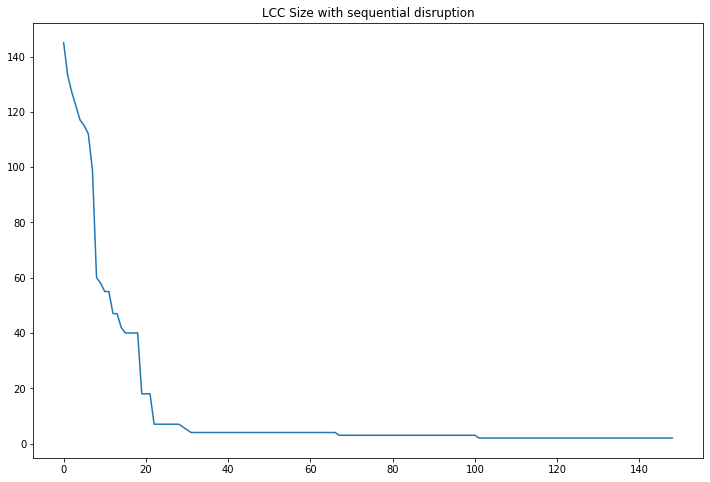

In [48]:
plt.figure(figsize=(12,8))
plt.plot(dflcc['No'], dflcc['centrality'])
plt.title("LCC Size with sequential disruption")
plt.show()

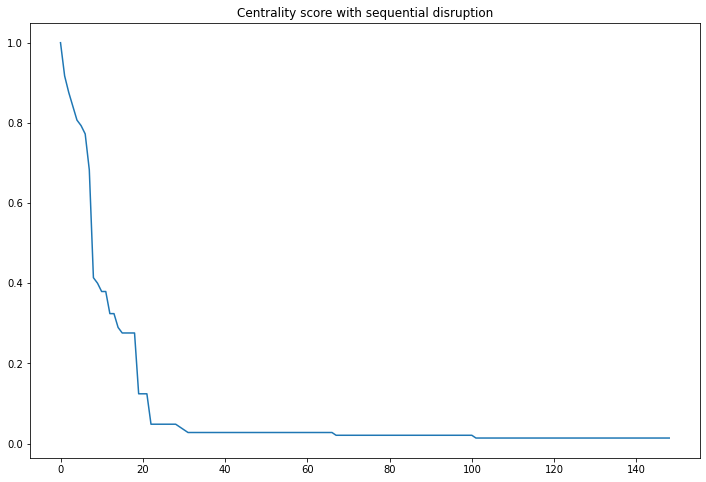

In [49]:
plt.figure(figsize=(12,8))
plt.plot(dflccvar['No'], dflccvar['centrality'])
plt.title("Centrality score with sequential disruption")
plt.show()

## Block disruption

In [63]:
nrem = 5

In [64]:
def disruption_block(Graph, weight=None):

    Gor = copy.deepcopy(Graph)
    lccinit = lcc_size(Graph) 
    dflcc = pd.DataFrame()
    dflccvar = pd.DataFrame()

    dictx = dict()
    dicty = dict()
    kiter = 0
    toremove = array.array('i', [])

    while Gor.number_of_nodes() > nrem:
        i = 0

        toremove = array.array('i', [])
        dictx[kiter] = lcc_size(Gor)
        dicty[kiter] = 1 - (abs((lcc_size(Gor) - lccinit) / lccinit))
        toremove = collective_influence_centality(Gor, toremove, weight=weight)
        
        while i < nrem:
            if Gor.number_of_nodes() <= nrem:
                break
            Gor.remove_node(toremove[0])
            toremove.pop(0)
            kiter += 1
            i += 1
    
    dflcc['No'] = list(dictx.keys())
    dflccvar['No'] = dflcc['No']
    dflcc['centrality'] = list(dictx.values())
    dflccvar['centrality'] = list(dicty.values())
    
    return dflcc, dflccvar

In [65]:
dflcc, dflccvar = disruption_block(G)

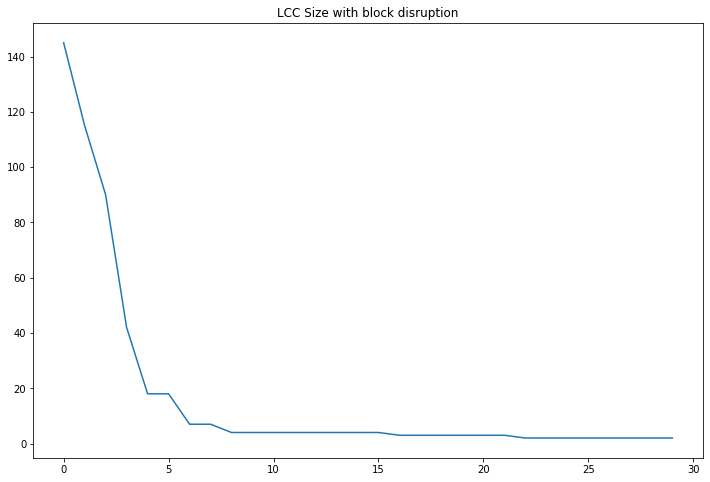

In [66]:
plt.figure(figsize=(12,8))
plt.plot(dflcc['centrality'])
plt.title("LCC Size with block disruption")
plt.show()

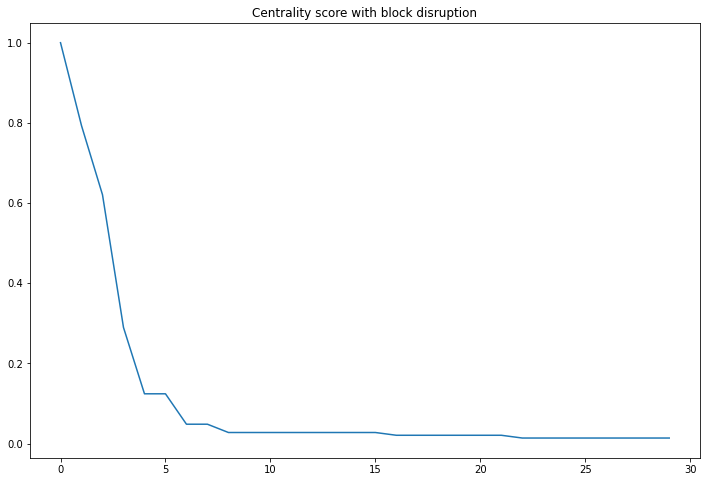

In [57]:
plt.figure(figsize=(12,8))
plt.plot(dflccvar['centrality'])
plt.title("Centrality score with block disruption")
plt.show()

# Try with betweenness

In [70]:
import operator

def max_centr(Graph, torem, weight=None):

    if weight is None:
        dcentr = nx.betweenness_centrality(Graph)
    else:
        dcentr = nx.betweenness_centrality(Graph, weight='weight')
    
    sorted_x = sorted(dcentr.items(), key=operator.itemgetter(1))
    for rem_n in range(1, nrem + 1):
        torem.append(sorted_x[-rem_n][0])
    return torem

In [71]:
def disruption_block(Graph, weight=None):

    Gor = copy.deepcopy(Graph)
    lccinit = lcc_size(Graph) 
    dflcc = pd.DataFrame()
    dflccvar = pd.DataFrame()

    dictx = dict()
    dicty = dict()
    kiter = 0
    toremove = array.array('i', [])

    while Gor.number_of_nodes() > nrem:
        i = 0

        toremove = array.array('i', [])
        dictx[kiter] = lcc_size(Gor)
        dicty[kiter] = 1 - (abs((lcc_size(Gor) - lccinit) / lccinit))
        toremove = max_centr(Gor, toremove, weight=weight)
        
        while i < nrem:
            if Gor.number_of_nodes() <= nrem:
                break
            Gor.remove_node(toremove[0])
            toremove.pop(0)
            kiter += 1
            i += 1
    
    dflcc['No'] = list(dictx.keys())
    dflccvar['No'] = dflcc['No']
    dflcc['centrality'] = list(dictx.values())
    dflccvar['centrality'] = list(dicty.values())
    
    return dflcc, dflccvar

In [72]:
dflcc, dflccvar = disruption_block(G)

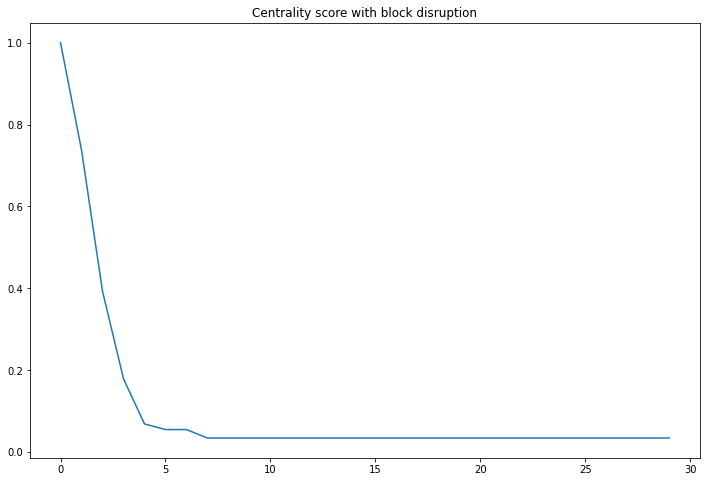

In [73]:
plt.figure(figsize=(12,8))
plt.plot(dflccvar['centrality'])
plt.title("Centrality score with block disruption")
plt.show()